Columns in UHI data: Index(['Longitude', 'Latitude', 'datetime', 'UHI Index'], dtype='object')


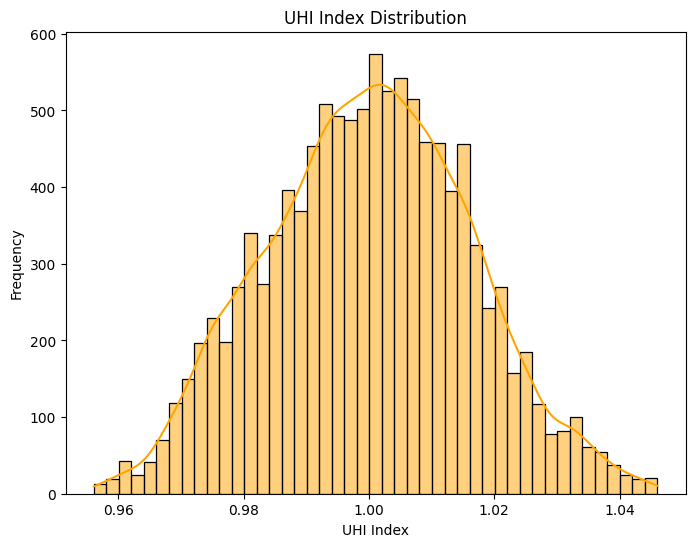

✅ Converted KML to CSV: Saved as `building_footprints.csv`
Processed weather data saved. Files in processed folder:
   Longitude   Latitude            datetime  UHI Index
0 -73.909167  40.813107 2021-07-24 15:53:00   1.030289
1 -73.909187  40.813045 2021-07-24 15:53:00   1.030289
2 -73.909215  40.812978 2021-07-24 15:53:00   1.023798
3 -73.909242  40.812908 2021-07-24 15:53:00   1.023798
4 -73.909257  40.812845 2021-07-24 15:53:00   1.021634


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


# Load the UHI data from CSV
uhi_df = pd.read_csv("../data/raw/UHI_data.csv")

# Print the column names to confirm
print("Columns in UHI data:", uhi_df.columns)

# Plot a histogram of the UHI Index
plt.figure(figsize=(8, 6))
sns.histplot(uhi_df["UHI Index"], kde=True, color="orange")
plt.title("UHI Index Distribution")
plt.xlabel("UHI Index")
plt.ylabel("Frequency")
plt.show()

weather_df = pd.read_excel("../data/raw/NY_Mesonet_Weather.xlsx")

# Load KML file
gdf = gpd.read_file("../data/raw/Building_Footprint.kml", driver="KML")

# Convert to CSV
gdf.to_csv("../data/processed/building_footprints.csv", index=False)

print("✅ Converted KML to CSV: Saved as `building_footprints.csv`")

# (Optional) If there is a timestamp column, convert it:
if 'timestamp' in weather_df.columns:
    weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'])

# Verify that the file has been created:
print("Processed weather data saved. Files in processed folder:")

# (Optional) Convert 'datetime' to a datetime object for further time-based analysis
uhi_df['datetime'] = pd.to_datetime(uhi_df['datetime'], format='%d-%m-%Y %H:%M')
uhi_df.to_csv("../data/processed/UHI_data_processed.csv", index=False)
print(uhi_df.head())